#Time for a Hands on Task!

Here we are going to do fog removal from an image using histogram equalisation and a bilateral filter. We will be implementing the following paper: 

https://www.researchgate.net/publication/261452039_Single_image_fog_removal_using_bilateral_filter 

You can go through it if you wish to understand the process better.

 Fog formation is due to attenuation and airlight. Attenuation reduces the contrast and airlight increases the whiteness in the scene. This algorithm uses bilateral filter for the estimation of airlight and recovers scene contrast.
 
 The effect of fog is a function of distance from the camera to the point. Hence we need to estimate an airlight map (or depth map) to undo the effect of the fog. 
 
 First we will estimate the airlight map, then refine it and then restore the original image to defog it.
 

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import urllib.request as ur
matplotlib.rcParams['figure.figsize']=[10,16]

## First we get our input image

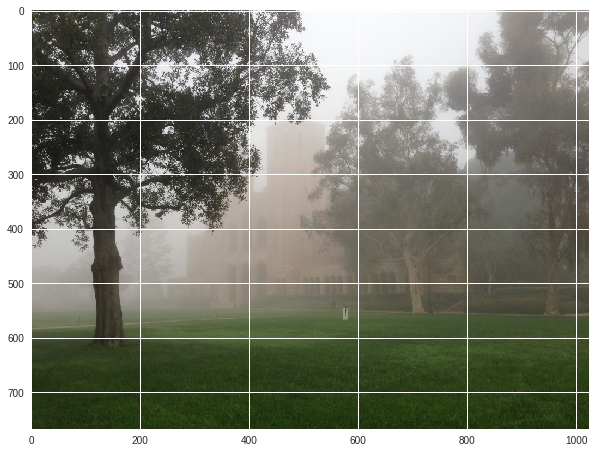

In [4]:
i_inf = 1

def url_to_image(url):
  # download the image, convert it to a NumPy array, and then read
  # it into OpenCV format
  resp = ur.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  # Channel interchange problem (RGB for matplotlib, and BGR for cv2)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # return the image
  return image

img = url_to_image("http://brucedumes.me/wp-content/uploads/2012/12/foggy-ucla-1024x768.jpg")
plt.imshow(img) #Original image
plt.show()

## Now we do histogram equalisation

Before we estimate the airlight map, we will do histogram equalisation to increase the contrast of the image. This will give us a better estimate of the airlight map.

In [0]:
#Now we have our image.
#Time to do histogram equalisation

def equalise_hist(img): #Complete this function
  #First convert the image to YUV format using cv2.cvtColor()
  #Then equalise the Y channel of the image using cv2.equalizeHist()
  #Now convert the image back to BGR with cv2.cvtColor()
  
  
  
  #Now return the image
  

img = equalise_hist(img) #We now have our histogram equalised image
plt.imshow(img)
plt.show()

## Define the Airlight Map

We will not delve into why we initialise the airlight map like this here. You can take a look at the original paper for understanding it better.

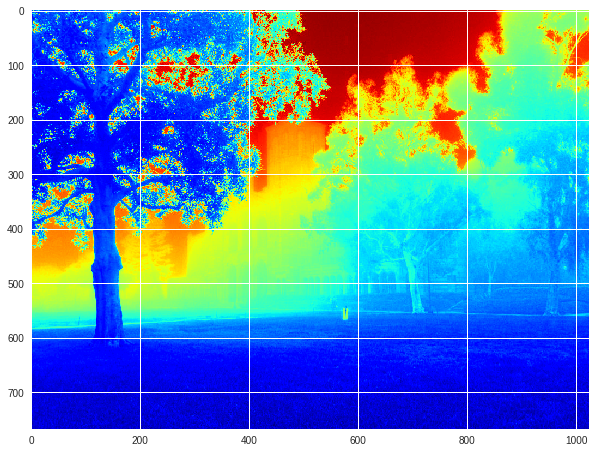

In [6]:
#We need to define an airlight map
def initialise_airmap(img, beta = 0.9):
  img_c = img/255 #Normalisation
  if img.shape[-1] > 1: #If image has more than one channel
    min_img = beta*(np.amin(img_c,axis = 2)) #Finds the minimum among all colour components of the image
  else:
    min_img = beta*img_c
  return min_img
    
airmap = initialise_airmap(img) #We have an airmap now.
plt.figure(figsize = (10,16))
plt.imshow(airmap, cmap = 'jet')
plt.show()

## Refine the Airmap

Airlight map is the function of the distance between object
and camera. Different object may be at different distance
from camera and thus airlight should be different for different
object. Also it must be smooth for an object except along
the edges. Hence airlight map undergo intra-region smoothing
preferentially over inter-region smoothing. This can be done using a bilateral filter.

In [0]:
#Time to refine the airmap using a bilateral filter
def refine_the_airmap(airmap):#Complete this function
  airmap = (airmap*255).astype('uint8') #Converting to 8 bit unsigned int
  #Use bilater filter here and store the changes in airmap itself and then return it.(Can use the same parameters as those used in the session notebook)
  

refine_airmap = refine_the_airmap(airmap)/255 #Airmap is now refined
plt.figure(figsize = (10,16))
plt.imshow(refine_airmap, cmap = 'jet')
plt.show() #Can view the changes

## Image Restoration

Again, we will not be delving into why we do the following for obtaining the defogged image. You can take a look at the original paper to understand it better.

In [0]:
#Time to restore our image and get the final output

def restoration(img, refine_airmap, i_inf = [1]): #Does the restoration for a single channel
    return(((img - refine_airmap)/(1.0 - refine_airmap/i_inf)))
  
def get_final_output(img):
  #img is a 3 channel image. Call restoration() thrice; Once for each channel. One channel is done for reference
  img = img/255
  img[:,:,0] = restoration(img[:,:,0],refine_airmap)
  #Do the same for the other 2
  
  
  img_c = (np.clip(img, 0, 1)*255).astype('uint8') #Fits all the pixels to [0,1] and converts to 8 bit unsigned int
  #Now return img_c
  

img_c = get_final_output(img)

#We got our final output now. Let's view it.
disp = np.hstack((img, img_c))
plt.figure(figsize = (32,16))
plt.subplot(121)
plt.imshow(img)
plt.title("Initial Input image")
plt.subplot(122)
plt.imshow(img_c)
plt.title("Haze Removed Process")
plt.show()